# Using INSURANCE dataset ,practicing EDA and training a Model with this


**selecting all the necessary modules**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import pandas.util.testing as tm
import pickle

**Reading the file into dataframe**

In [3]:
ins = pd.read_csv('insurance.csv')

In [4]:
ins.head(5)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [5]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
ins.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


**Classifying categorical and numerical data and then converting categorical into some numerical form**

In [7]:
all_columns=list(ins.columns)
print(all_columns)
categorical=['sex','smoker','region']
numerical=['age','children','bmi']
terget=['expenses']

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses']


In [8]:
categorical_x=pd.DataFrame()
for col in categorical:
    dummies=pd.get_dummies(ins[col])
    categorical_x=pd.concat([categorical_x,dummies],axis=1)
numerical_x=pd.DataFrame(ins[numerical])

**Plotting some graphs to get insight of data**

Text(0.5, 0.98, 'Categorical Variables vs Expenses')

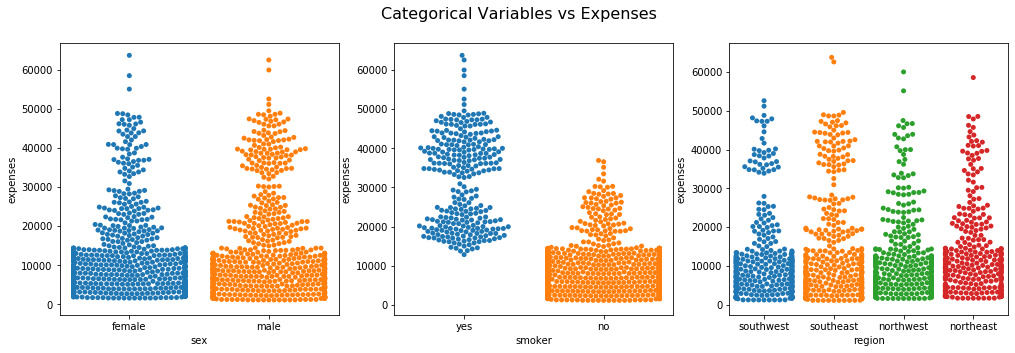

In [9]:
fig ,axes=plt.subplots(nrows=1,ncols=3,figsize=(17,5))
sns.swarmplot(ax=axes[0],x='sex' , y='expenses' ,data=ins)
sns.swarmplot(ax=axes[1],x='smoker', y='expenses', data=ins)
sns.swarmplot(ax=axes[2],x='region', y='expenses', data=ins)
fig.suptitle('Categorical Variables vs Expenses', fontsize=16)

Text(0.5, 0.98, 'Numerical Variable vs Expenses')

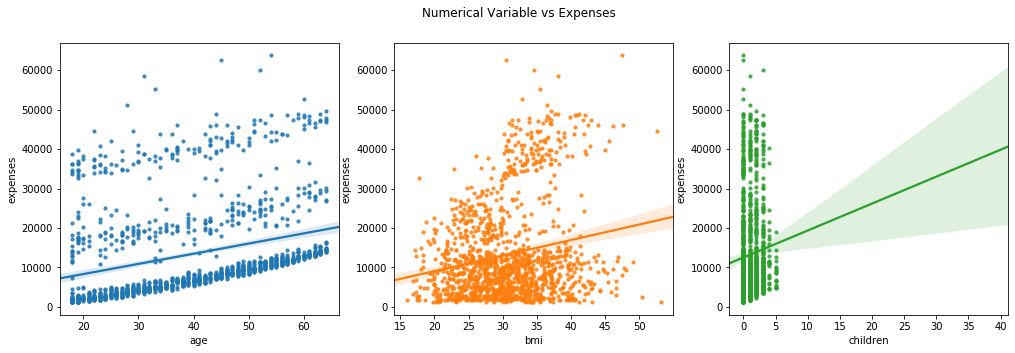

In [10]:
fig,axes=plt.subplots(1,3,figsize=(17,5))
sns.regplot(ax=axes[0],x='age', y='expenses', data=ins ,scatter_kws={'s':10})
sns.regplot(ax=axes[1],x='bmi', y='expenses', data=ins ,scatter_kws={'s':10})
sns.regplot(ax=axes[2],x='children', y='expenses', data=ins ,scatter_kws={'s':10})
fig.suptitle('Numerical Variable vs Expenses',fontsizE=16)

**Training Linear Regression Model**

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error ,mean_absolute_error

In [10]:
lm=LinearRegression()

In [11]:
X=pd.concat([categorical_x,numerical_x],axis=1)
Y=ins['expenses']

In [12]:
#droppind useless columns from the dataframe
X.drop(['female','no','children'],axis=1,inplace=True)

In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   male       1338 non-null   uint8  
 1   yes        1338 non-null   uint8  
 2   northeast  1338 non-null   uint8  
 3   northwest  1338 non-null   uint8  
 4   southeast  1338 non-null   uint8  
 5   southwest  1338 non-null   uint8  
 6   age        1338 non-null   int64  
 7   bmi        1338 non-null   float64
dtypes: float64(1), int64(1), uint8(6)
memory usage: 28.9 KB


In [14]:
X['male']=np.int_(X['male'])
X['yes']=np.int_(X['yes'])
X['northeast']=np.int_(X['northeast'])
X['northwest']=np.int_(X['northwest'])
X['southeast']=np.int_(X['southeast'])
X['southwest']=np.int_(X['southwest'])

In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   male       1338 non-null   int32  
 1   yes        1338 non-null   int32  
 2   northeast  1338 non-null   int32  
 3   northwest  1338 non-null   int32  
 4   southeast  1338 non-null   int32  
 5   southwest  1338 non-null   int32  
 6   age        1338 non-null   int64  
 7   bmi        1338 non-null   float64
dtypes: float64(1), int32(6), int64(1)
memory usage: 52.4 KB


In [16]:
X.rename(columns={'male':'sex','yes':'smoker'},inplace=True)

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=50)

In [18]:
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
pickle.dump(lm,open('model.sav','wb'))

In [19]:
predictions=lm.predict(X_test)

**Checking Error Score**

In [34]:
print("Mean Squared Error",mean_squared_error(Y_test,predictions))
print("Mean Absolute Error",mean_absolute_error(Y_test,predictions))

Mean Squared Error 35157455.04233398
Mean Absolute Error 4091.242956768442


In [54]:
pred=lm.predict([np.array([1,1,0,0,1,0,25,29])])
print(pred)

[26723.38938911]
